# Import Libaries & Read Data

In [120]:
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf 
from statsmodels.graphics.tsaplots import plot_pacf 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pmd
import scipy.stats

In [121]:
df=pd.read_csv("DailyDelhiClimateTrain.csv") # train data
df2=pd.read_csv("DailyDelhiClimateTest.csv") # test data

In [122]:
df.head(3)

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.5,0.000000,1015.666667
1,2013-01-02,7.400000,92.0,2.980000,1017.800000
2,2013-01-03,7.166667,87.0,4.633333,1018.666667


In [123]:
df2.head(3)

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333


# Data Cleaning & Preprocessing

In [124]:
# remove unwanted columns
cols=["humidity","wind_speed","meanpressure"]
df.drop(cols,axis=1,inplace=True)
df2.drop(cols,axis=1,inplace=True)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      1462 non-null   object 
 1   meantemp  1462 non-null   float64
dtypes: float64(1), object(1)
memory usage: 23.0+ KB


In [126]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      114 non-null    object 
 1   meantemp  114 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.9+ KB


In [127]:
# convert date to datetime
df.date=df.date.astype("datetime64[ns]")
df2.date=df2.date.astype("datetime64[ns]")

In [128]:
# set date as index
df=df.set_index("date")
df2=df2.set_index("date")

In [129]:
df.tail(3)

,meantemp
date,
2016-12-30,14.095238
2016-12-31,15.052632
2017-01-01,10.000000


In [130]:
df2.head(3)

,meantemp
date,
2017-01-01,15.913043
2017-01-02,18.500000
2017-01-03,17.111111


# Data Visualization

<Axes: xlabel='date'>

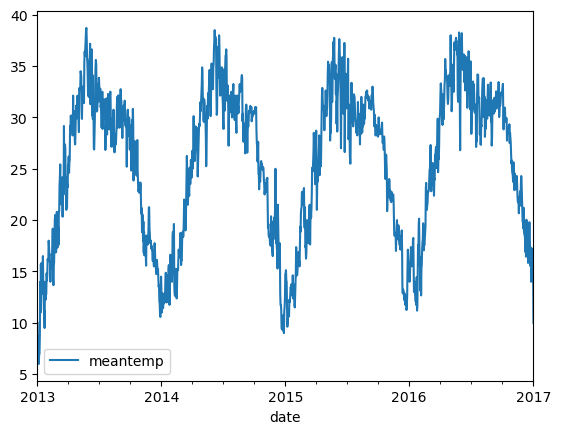

In [131]:
# Plot time series data
df.plot()

# Exploratory Data Analysis

### Time Series Decomposition

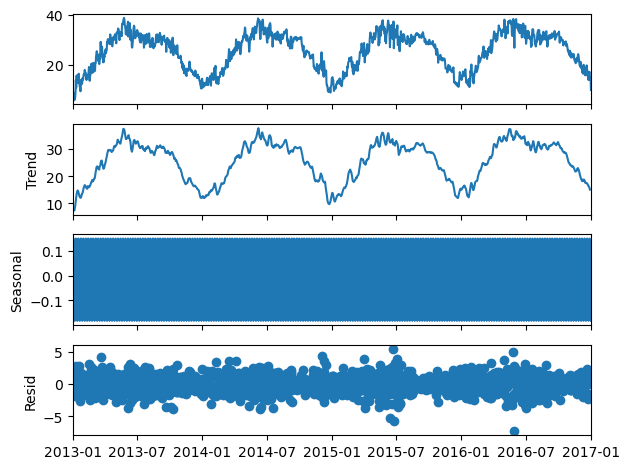

In [132]:
# Decompose time series
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
decomposition.plot()
plt.show()

### Autocorrelation

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

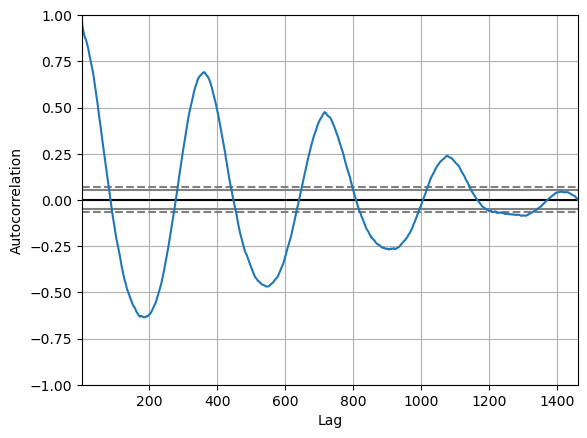

In [133]:
autocorrelation_plot(df)
# From the below graphs it is demonstrated that there is seasonality in the dataset. 
# A damped sinusoidal wave is seen with a trough around every 350–400 lags.

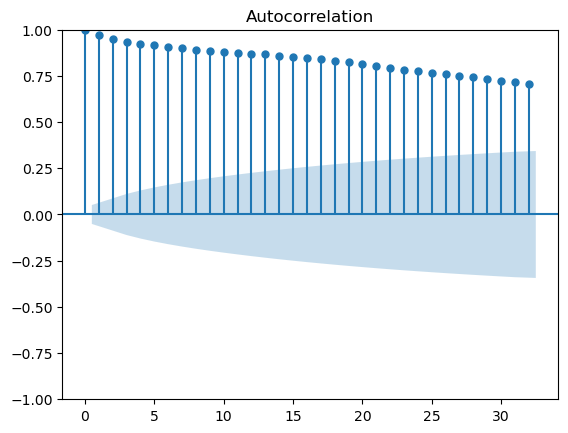

In [134]:
plot_acf(df)
plt.show()
# ACF plots show the correlation between a time series and a lagged version of itself. 
# The ACF graph is decreasing exponentially.

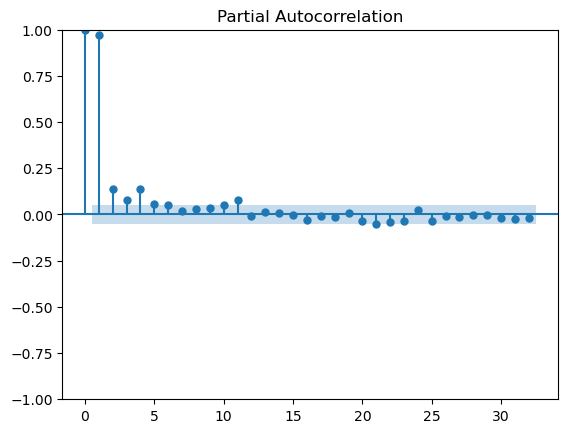

In [135]:
plot_pacf(df)
plt.show()

### Identifying Stationarity

In [136]:
# The Augmented Dickey-Fuller (ADF) test is a statistical test used to 
# determine whether a given time series is stationary or not
# Stationarity is an important concept in time series analysis, and it means that the 
# statistical properties of a time series (such as mean, variance, and autocorrelation) do not change over time.

In [137]:
dftest = adfuller(df.meantemp, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.021069055920671
2. P-Value :  0.2774121372301611
3. Num Of Lags :  10
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1451
5. Critical Values :
	 1% :  -3.4348647527922824
	 5% :  -2.863533960720434
	 10% :  -2.567831568508802


In [138]:
# p value is > 0.05 meaning the data is not stationary. SARIMA is appropriate for the model

# Building the SARIMA Model

In [139]:
model=pmd.auto_arima(df,start_p=1,start_q=1,test='adf',m=12,seasonal=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=5543.944, Time=2.22 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=5650.181, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=5615.079, Time=0.29 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=5602.960, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=5648.181, Time=0.04 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=5544.946, Time=0.91 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=5544.887, Time=0.68 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=5545.718, Time=5.23 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=5545.695, Time=5.58 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=5544.460, Time=0.50 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=5546.490, Time=2.47 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=5546.296, Time=2.07 sec
 ARIMA(1,1,1)(2,0,2)[12] intercept   : AIC=5547.925, Time=3.78 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=5604.958, Time=0.45 sec
 ARIMA(1,1,0)(1,0,1

# Train Data

In [140]:
# fit the model into the data 
sarima=SARIMAX(df,order=(1,1,1),seasonal_order=(1,0,1,12))
predicted=sarima.fit().predict();predicted

C:\Users\i\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\i\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2013-01-01     0.000000
2013-01-02     9.999995
2013-01-03     7.841684
2013-01-04     7.555284
2013-01-05     8.665322
                ...    
2016-12-28    16.702556
2016-12-29    17.159179
2016-12-30    15.521542
2016-12-31    14.752933
2017-01-01    15.341090
Freq: D, Name: predicted_mean, Length: 1462, dtype: float64

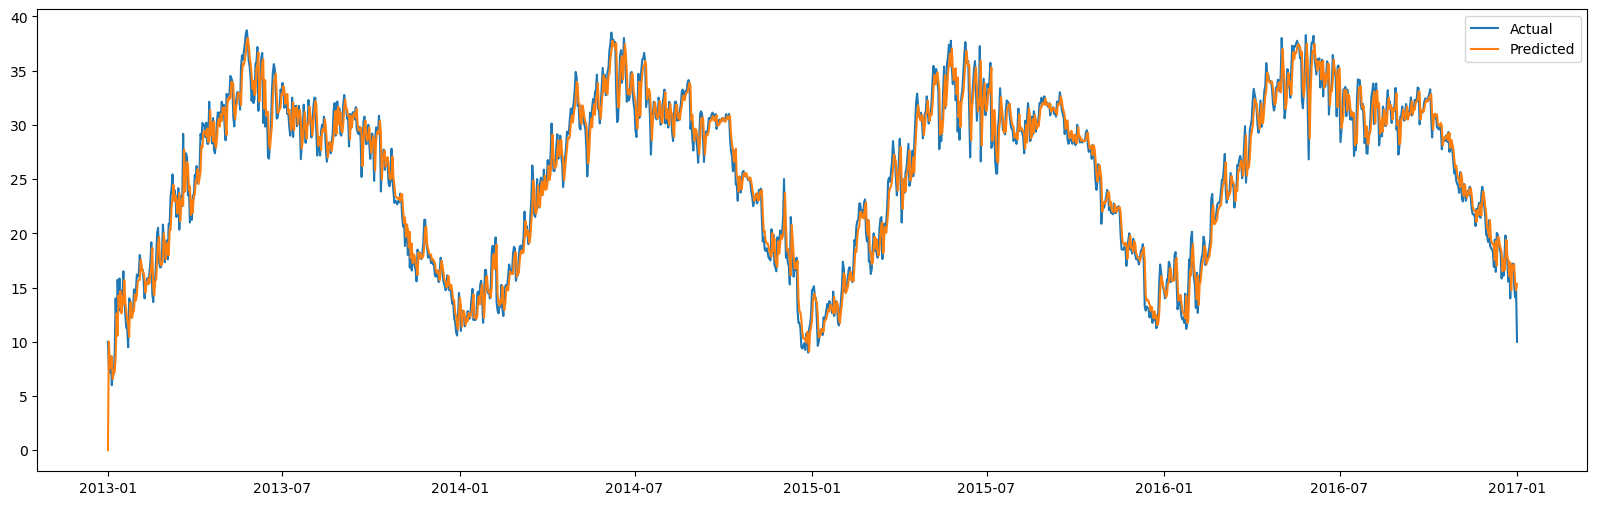

In [141]:
plt.figure(figsize=(20,6))
plt.plot(df,label='Actual')
plt.plot(predicted,label='Predicted')
plt.legend()

In [142]:
resid=df['meantemp']-predicted;resid
mae=abs(resid.mean());mae

0.010061720732724789

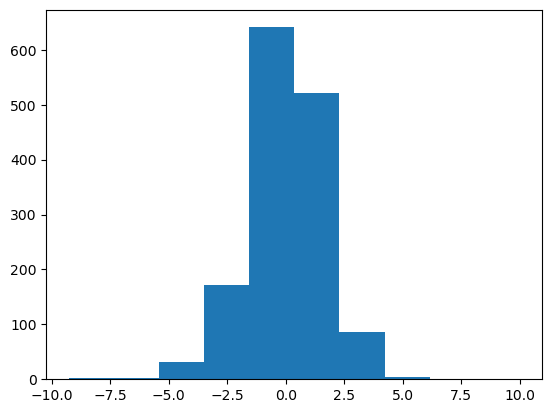

In [143]:
plt.hist(resid)
plt.show()
#residuals follow Normal distribution

In [144]:
(resid**2).mean() #mse

2.6489140508416034

# Test Data

In [145]:
sarima1=SARIMAX(df2['meantemp'],order=(1,1,1),seasonal_order=(1,0,1,12))
predicted1=sarima1.fit().predict();predicted1

C:\Users\i\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\i\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2017-01-01     0.000000
2017-01-02    15.913037
2017-01-03    18.158430
2017-01-04    17.308265
2017-01-05    18.482859
                ...    
2017-04-20    33.916850
2017-04-21    34.098316
2017-04-22    34.096909
2017-04-23    32.823739
2017-04-24    32.814087
Freq: D, Name: predicted_mean, Length: 114, dtype: float64

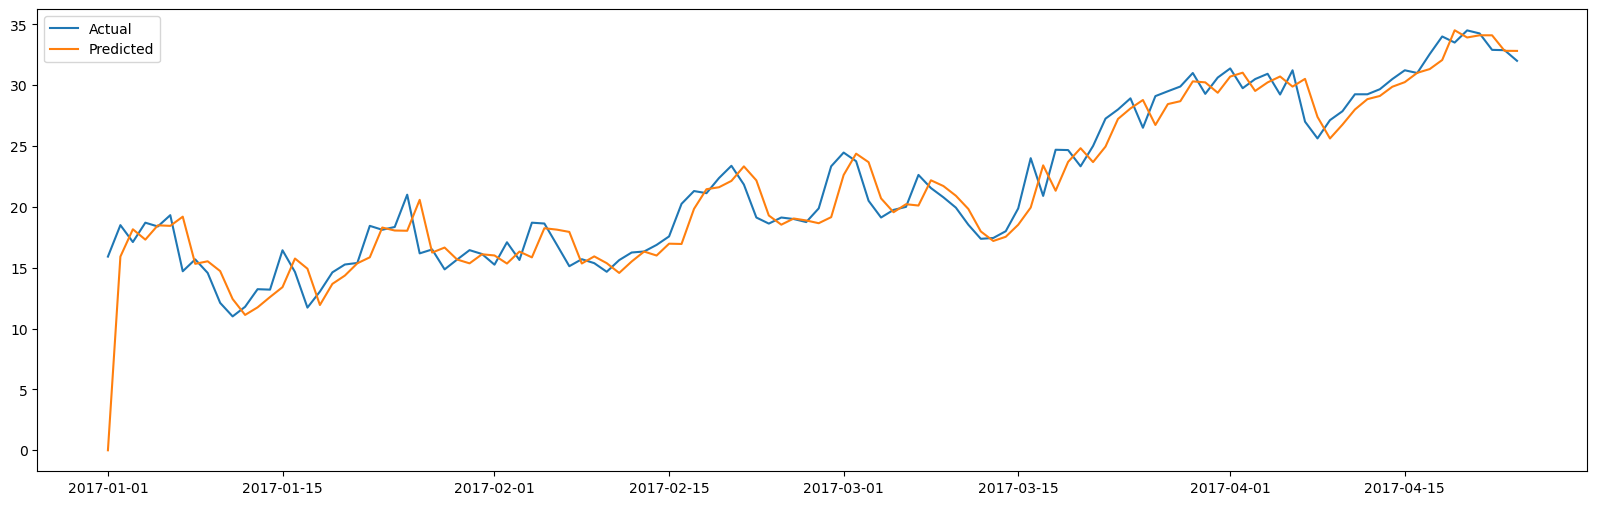

In [146]:
plt.figure(figsize=(20,6))
plt.plot(df2['meantemp'],label='Actual')
plt.plot(predicted1,label='Predicted')
plt.legend()

In [147]:
resid1=df2['meantemp']-predicted1;resid1
mae1=abs(resid1.mean());mae1

0.32643632552815843

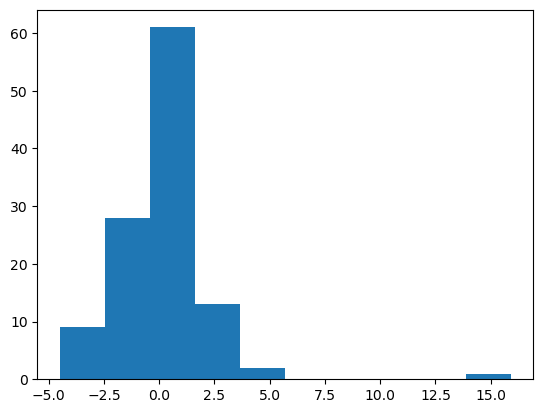

In [148]:
plt.hist(resid1)
plt.show()

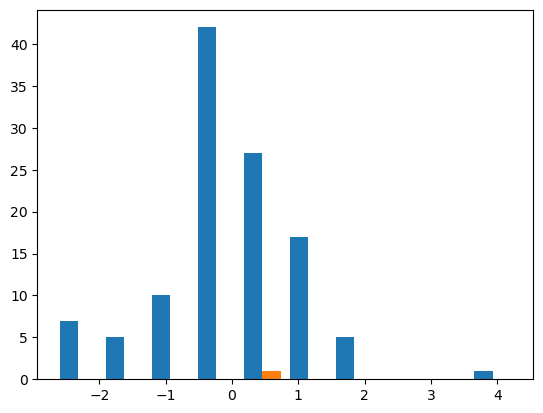

In [149]:
resid11=scipy.stats.boxcox(abs(resid1))
plt.hist(resid11)
plt.show()

In [150]:
(resid1**2).mean() #mse

4.924989810529808

# Future Prediction for the next 30 days

In [151]:
model.fit(df2)
pred1=model.predict(n_periods=30);pred1

2017-04-25    32.023552
2017-04-26    31.877191
2017-04-27    31.727048
2017-04-28    31.758087
2017-04-29    31.500114
2017-04-30    31.197101
2017-05-01    31.367341
2017-05-02    31.206868
2017-05-03    31.222424
2017-05-04    31.457863
2017-05-05    31.437981
2017-05-06    31.598109
2017-05-07    31.584345
2017-05-08    31.598297
2017-05-09    31.610124
2017-05-10    31.607667
2017-05-11    31.628598
2017-05-12    31.653198
2017-05-13    31.639378
2017-05-14    31.652405
2017-05-15    31.651142
2017-05-16    31.632029
2017-05-17    31.633643
2017-05-18    31.620644
2017-05-19    31.621762
2017-05-20    31.620629
2017-05-21    31.619669
2017-05-22    31.619868
2017-05-23    31.618169
2017-05-24    31.616172
Freq: D, dtype: float64

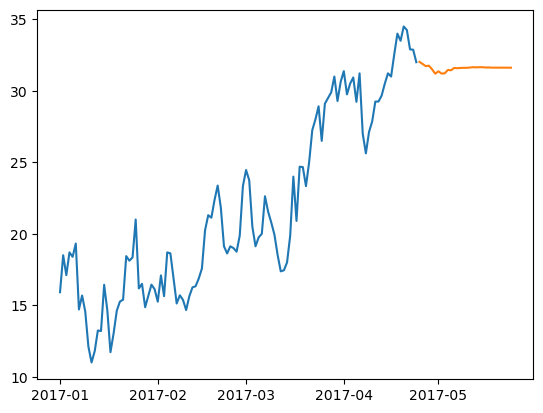

In [152]:
plt.plot(df2)
plt.plot(pred1)

In [153]:
newtemp=df2['meantemp']
newertemp=pd.concat([predicted1,pred1]);newertemp

2017-01-01     0.000000
2017-01-02    15.913037
2017-01-03    18.158430
2017-01-04    17.308265
2017-01-05    18.482859
                ...    
2017-05-20    31.620629
2017-05-21    31.619669
2017-05-22    31.619868
2017-05-23    31.618169
2017-05-24    31.616172
Freq: D, Length: 144, dtype: float64

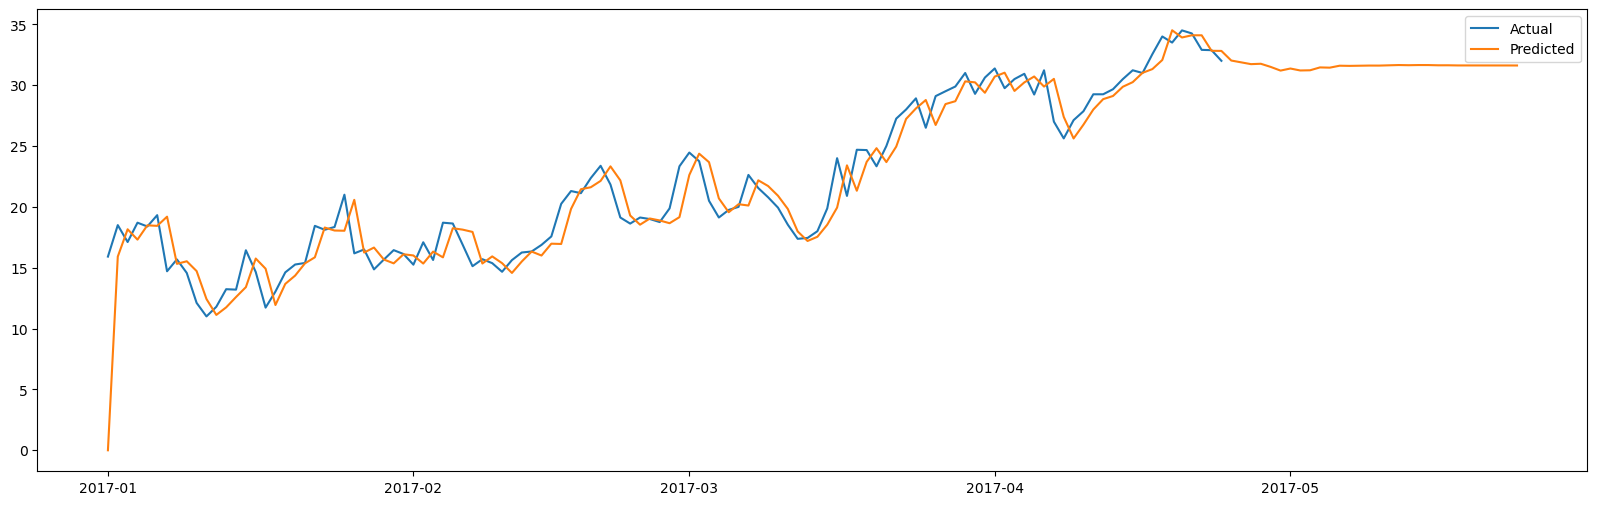

In [154]:
plt.figure(figsize=(20,6))
plt.plot(df2,label='Actual')
plt.plot(newertemp,label='Predicted')
plt.legend()